Import .csv files, drop unwanted columns and aply one-hot encoding.

Will drop columns "Experiment type" and "Disease MESH ID" as they are non-informative.
One-hot encoding will be applied for column "Sex".

In [73]:

import pandas as pd

# Load CSVs
dev_set = pd.read_csv('assignment1_dev_set.csv', index_col=0)
val_set = pd.read_csv('assignment1_val_set.csv', index_col=0)

# Drop unnecessary columns
columns_to_drop = ["Experiment type", "Disease MESH ID"]
dev_set.drop(columns=columns_to_drop, inplace=True)
val_set.drop(columns=columns_to_drop, inplace=True)

# Encode Sex: Male → 1, Female → 0
sex_map = {'Male': 1, 'Female': 0}
dev_set['Sex'] = dev_set['Sex'].map(sex_map)
val_set['Sex'] = val_set['Sex'].map(sex_map)

In [68]:
val_set

,Project ID,Sex,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,PRJEB11419,1,60.0,25.71,0.0,0.000000,1.621960,0.000000,0.000000,0.068238,...,0.000000,2.871240,0.000000,0.068238,0.115479,0.015747,0.010498,0.000000,0.010498,0.551152
1,PRJNA379979,1,57.0,27.20,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,PRJEB11419,1,65.0,22.35,0.0,0.002095,0.000000,0.000000,0.002095,0.041895,...,0.000000,0.064936,0.000000,0.016758,0.000000,0.041895,0.010474,0.006284,0.014663,0.000000
3,PRJEB11419,1,55.0,25.52,0.0,0.000000,0.044998,0.000000,0.013846,0.010384,...,0.003461,0.089996,0.000000,0.003461,0.006923,0.000000,0.000000,0.020768,0.034614,0.013846
4,PRJNA379979,0,54.0,21.60,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,PRJEB11419,0,51.0,22.67,0.0,0.000000,0.692094,0.000000,0.000000,0.000000,...,0.010104,0.383935,0.000000,0.070725,0.000000,0.045466,0.000000,0.000000,0.000000,0.015155
207,PRJNA379979,1,54.0,25.60,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
208,PRJNA388263,1,52.0,25.80,0.0,0.000000,0.000000,0.001452,0.004357,0.111836,...,0.000000,0.023239,0.001452,0.015977,0.000000,0.000000,0.001452,0.000000,0.013072,0.015977
209,PRJEB11419,1,26.0,26.54,0.0,0.000000,0.015966,0.000000,0.207557,0.000000,...,0.005322,0.564130,0.000000,0.015966,0.000000,0.074508,0.000000,0.000000,0.000000,0.021288


Create demographics table

In [74]:
def demographics_summary(df, label):
    sex_counts = df['Sex'].value_counts().rename(index={0: 'Female', 1: 'Male'}).to_frame(name='Count')
    sex_counts['%'] = (sex_counts['Count'] / sex_counts['Count'].sum() * 100).round(1)

    age_mean = df['Host age'].mean()
    age_std = df['Host age'].std()
    bmi_mean = df['BMI'].mean()
    bmi_std = df['BMI'].std()

    summary = {
        'Dataset': label,
        'N': len(df),
        'Male (%)': f"{sex_counts.loc['Male', 'Count']} ({sex_counts.loc['Male', '%']}%)" if 'Male' in sex_counts.index else '0 (0%)',
        'Female (%)': f"{sex_counts.loc['Female', 'Count']} ({sex_counts.loc['Female', '%']}%)" if 'Female' in sex_counts.index else '0 (0%)',
        'Age Mean ± SD': f"{age_mean:.1f} ± {age_std:.1f}",
        'BMI Mean ± SD': f"{bmi_mean:.1f} ± {bmi_std:.1f}"
    }

    return pd.DataFrame([summary])

# Generate summaries
dev_demo = demographics_summary(dev_set, 'Development')
val_demo = demographics_summary(val_set, 'Validation')

# Combine into one table
demo_table = pd.concat([dev_demo, val_demo], ignore_index=True)
print(demo_table)


       Dataset    N     Male (%)   Female (%) Age Mean ± SD BMI Mean ± SD
0  Development  489  302 (61.8%)  187 (38.2%)   46.7 ± 15.7    24.9 ± 4.2
1   Validation  211  142 (67.3%)   69 (32.7%)   46.3 ± 16.1    24.8 ± 4.0


<ipython-input-75-3601e2c0c622>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dev_set, x='Sex_Label', y='BMI', ax=axs[0, 1], palette='pastel')
<ipython-input-75-3601e2c0c622>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dev_set, x='Project ID', ax=axs[1, 1], palette='muted',


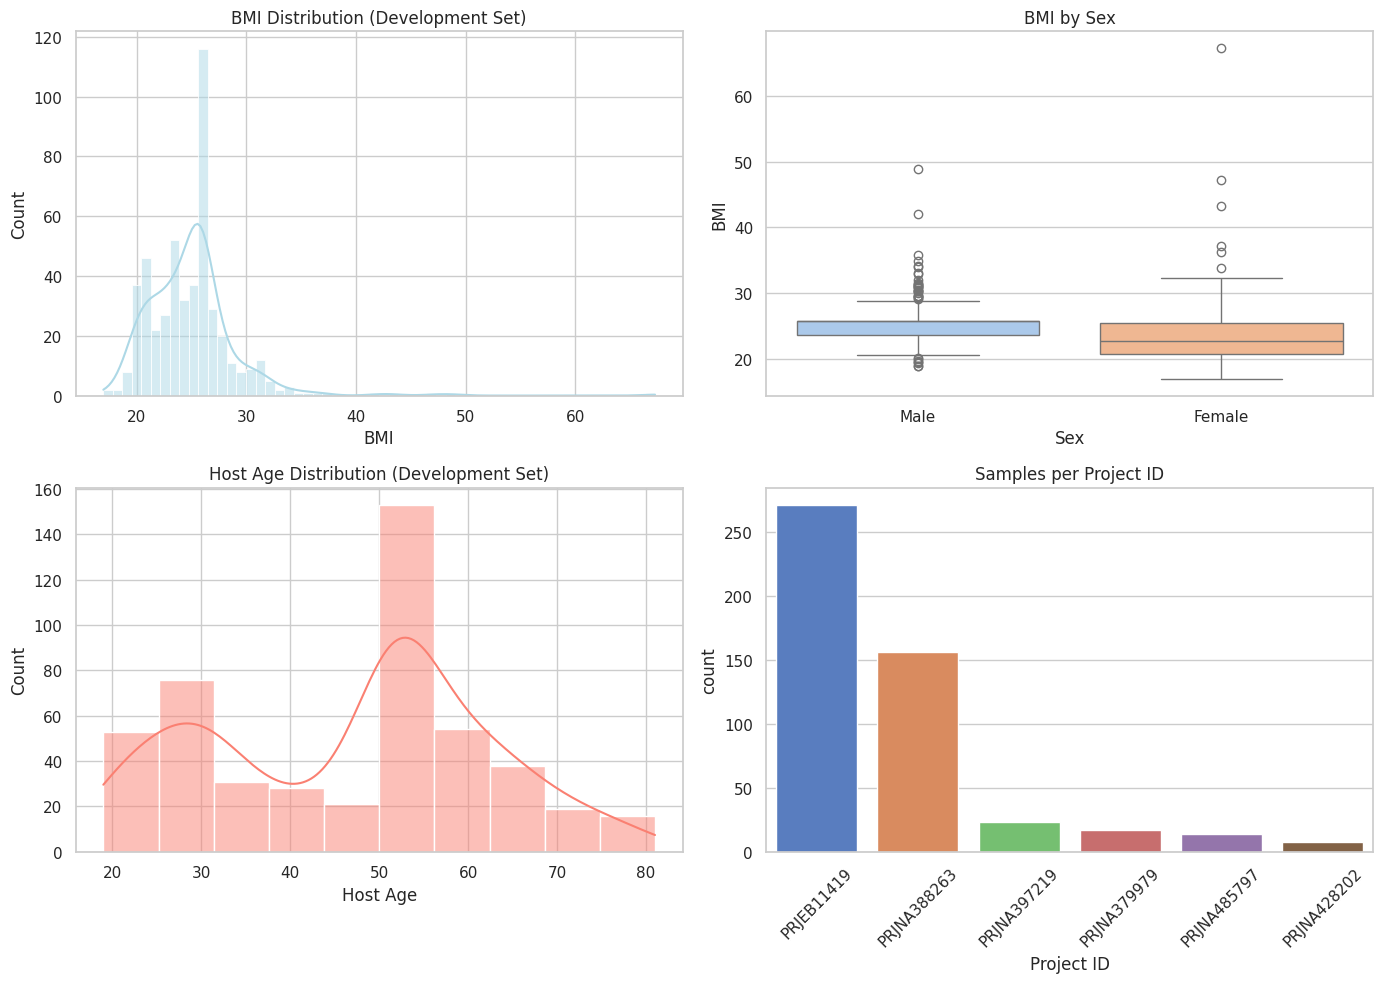

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# BMI Histogram
sns.histplot(dev_set['BMI'], kde=True, ax=axs[0, 0], color='lightblue')
axs[0, 0].set_title('BMI Distribution (Development Set)')
axs[0, 0].set_xlabel('BMI')

# BMI by Sex
sex_labels = {0: 'Female', 1: 'Male'}
dev_set['Sex_Label'] = dev_set['Sex'].map(sex_labels)
sns.boxplot(data=dev_set, x='Sex_Label', y='BMI', ax=axs[0, 1], palette='pastel')
axs[0, 1].set_title('BMI by Sex')
axs[0, 1].set_xlabel('Sex')

# Host Age Histogram
sns.histplot(dev_set['Host age'], kde=True, ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Host Age Distribution (Development Set)')
axs[1, 0].set_xlabel('Host Age')

# Project ID barplot
sns.countplot(data=dev_set, x='Project ID', ax=axs[1, 1], palette='muted',
              order=dev_set['Project ID'].value_counts().index)
axs[1, 1].set_title('Samples per Project ID')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


dev_set = dev_set.drop(columns='Sex_Label')

<ipython-input-76-3ac9b7e5b487>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=dev_set, palette='Set2')


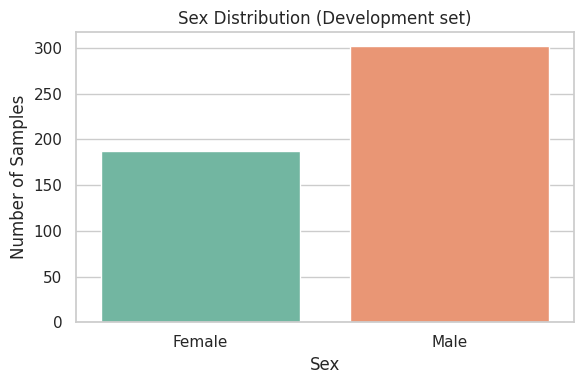

In [76]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=dev_set, palette='Set2')
plt.title('Sex Distribution (Development set)')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()


<ipython-input-77-6fd1e4304c44>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_abundance.values, y=mean_abundance.index, palette='viridis')


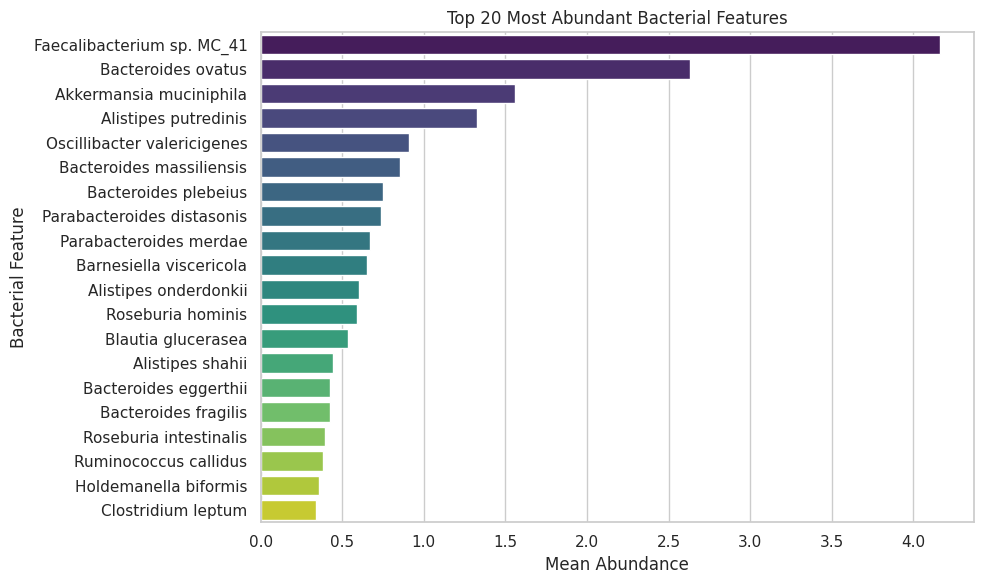

In [77]:
numeric_cols = dev_set.select_dtypes(include='number').columns.tolist()
exclude_cols = ['Sex', 'Host age', 'BMI', 'Project ID', 'Sex_Label'] #exclude data that are not about the microorganisms
bacterial_cols = [col for col in numeric_cols if col not in exclude_cols]

mean_abundance = dev_set[bacterial_cols].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_abundance.values, y=mean_abundance.index, palette='viridis')
plt.title('Top 20 Most Abundant Bacterial Features')
plt.xlabel('Mean Abundance')
plt.ylabel('Bacterial Feature')
plt.tight_layout()
plt.show()


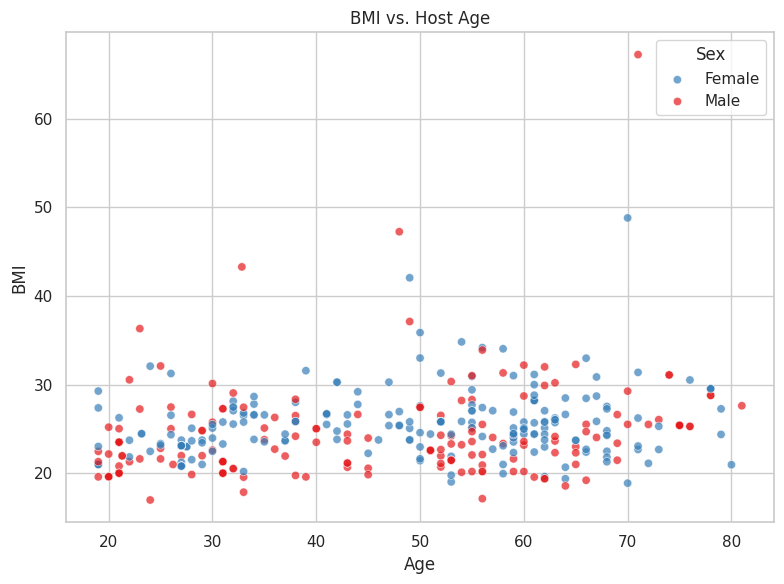

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dev_df, x='Host age', y='BMI', hue='Sex', palette='Set1', alpha=0.7)
plt.title('BMI vs. Host Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.tight_layout()
plt.show()


From the above plot we can see that there are outliers.

Remove outliers from all columns. There is no baseline for standard  outliers detection from a gut microbiome cloud.
In the scope of this assignment, we will apply basic outlier detection & removal, using IQR method.

In [79]:
import pandas as pd

# Columns 2 exclude
exclude_cols = ['Project ID', 'Sex']

filtered_dev_set = dev_set.copy() # to be safe

# Loop over columns except excluded
for col in filtered_dev_set.columns:
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(filtered_dev_set[col]):
        Q1 = filtered_dev_set[col].quantile(0.25)
        Q3 = filtered_dev_set[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter rows within bounds
        filtered_dev_set = filtered_dev_set[(filtered_dev_set[col] >= lower_bound) & (filtered_dev_set[col] <= upper_bound)]

# `filtered_dev_set` is your cleaned DataFrame


Scale data

In [80]:
from sklearn.preprocessing import StandardScaler

# Define columns to exclude from scaling
exclude_cols = ['Project ID', 'Sex', 'Host age', 'BMI']

# Identify numeric features to scale
features_to_scale = [col for col in dev_set.select_dtypes(include='number').columns
                     if col not in exclude_cols]

# Apply StandardScaler to the appropriate columns
scaler = StandardScaler()
dev_set[features_to_scale] = scaler.fit_transform(dev_set[features_to_scale])
val_set[features_to_scale] = scaler.transform(val_set[features_to_scale])


In order to get a first look of the data, we will visualize the informations regarding the gut microbiota populations. Check if there is correlation of some species with the BMI value, and if the appearances between the different species is correlated.

<ipython-input-81-11eda487e4c8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")


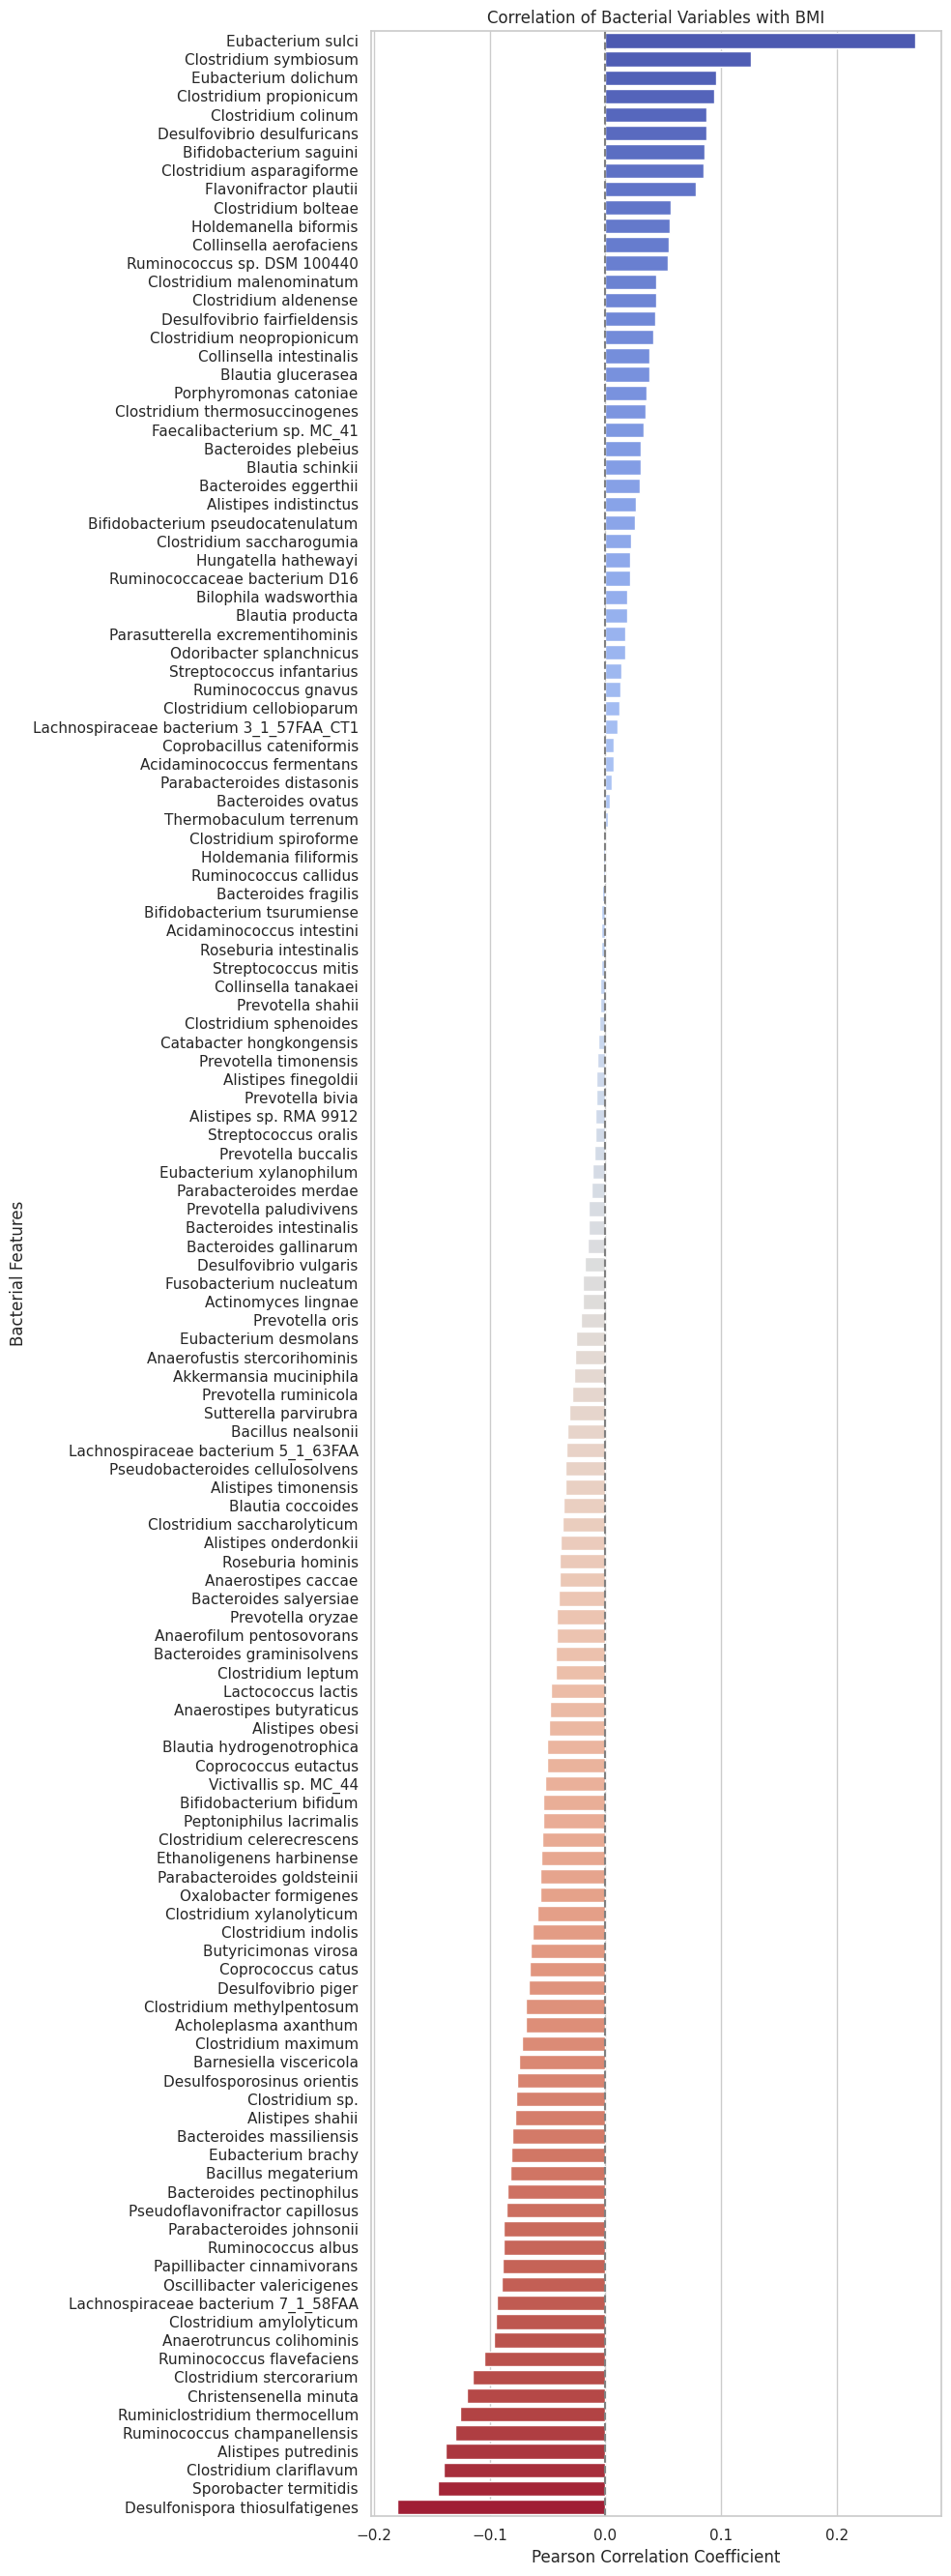

In [81]:
#  Pearson correlation coefficient
numeric_cols = dev_set.select_dtypes(include='number').columns.tolist()
exclude_cols = ['Sex', 'Host age', 'BMI', 'Project ID', 'Sex_Label'] #exclude data that are not about the microorganisms
bacterial_cols = [col for col in numeric_cols if col not in exclude_cols]
correlations = dev_set[bacterial_cols].corrwith(dev_set['BMI']).sort_values(ascending=False)

# Plot with dynamic height
num_features = len(correlations)
height = min(num_features * 0.2, 120)  #Restrict the plot

plt.figure(figsize=(10, height))
sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")
plt.title("Correlation of Bacterial Variables with BMI")
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Bacterial Features")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


Heatmap

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2000x1200 with 0 Axes>

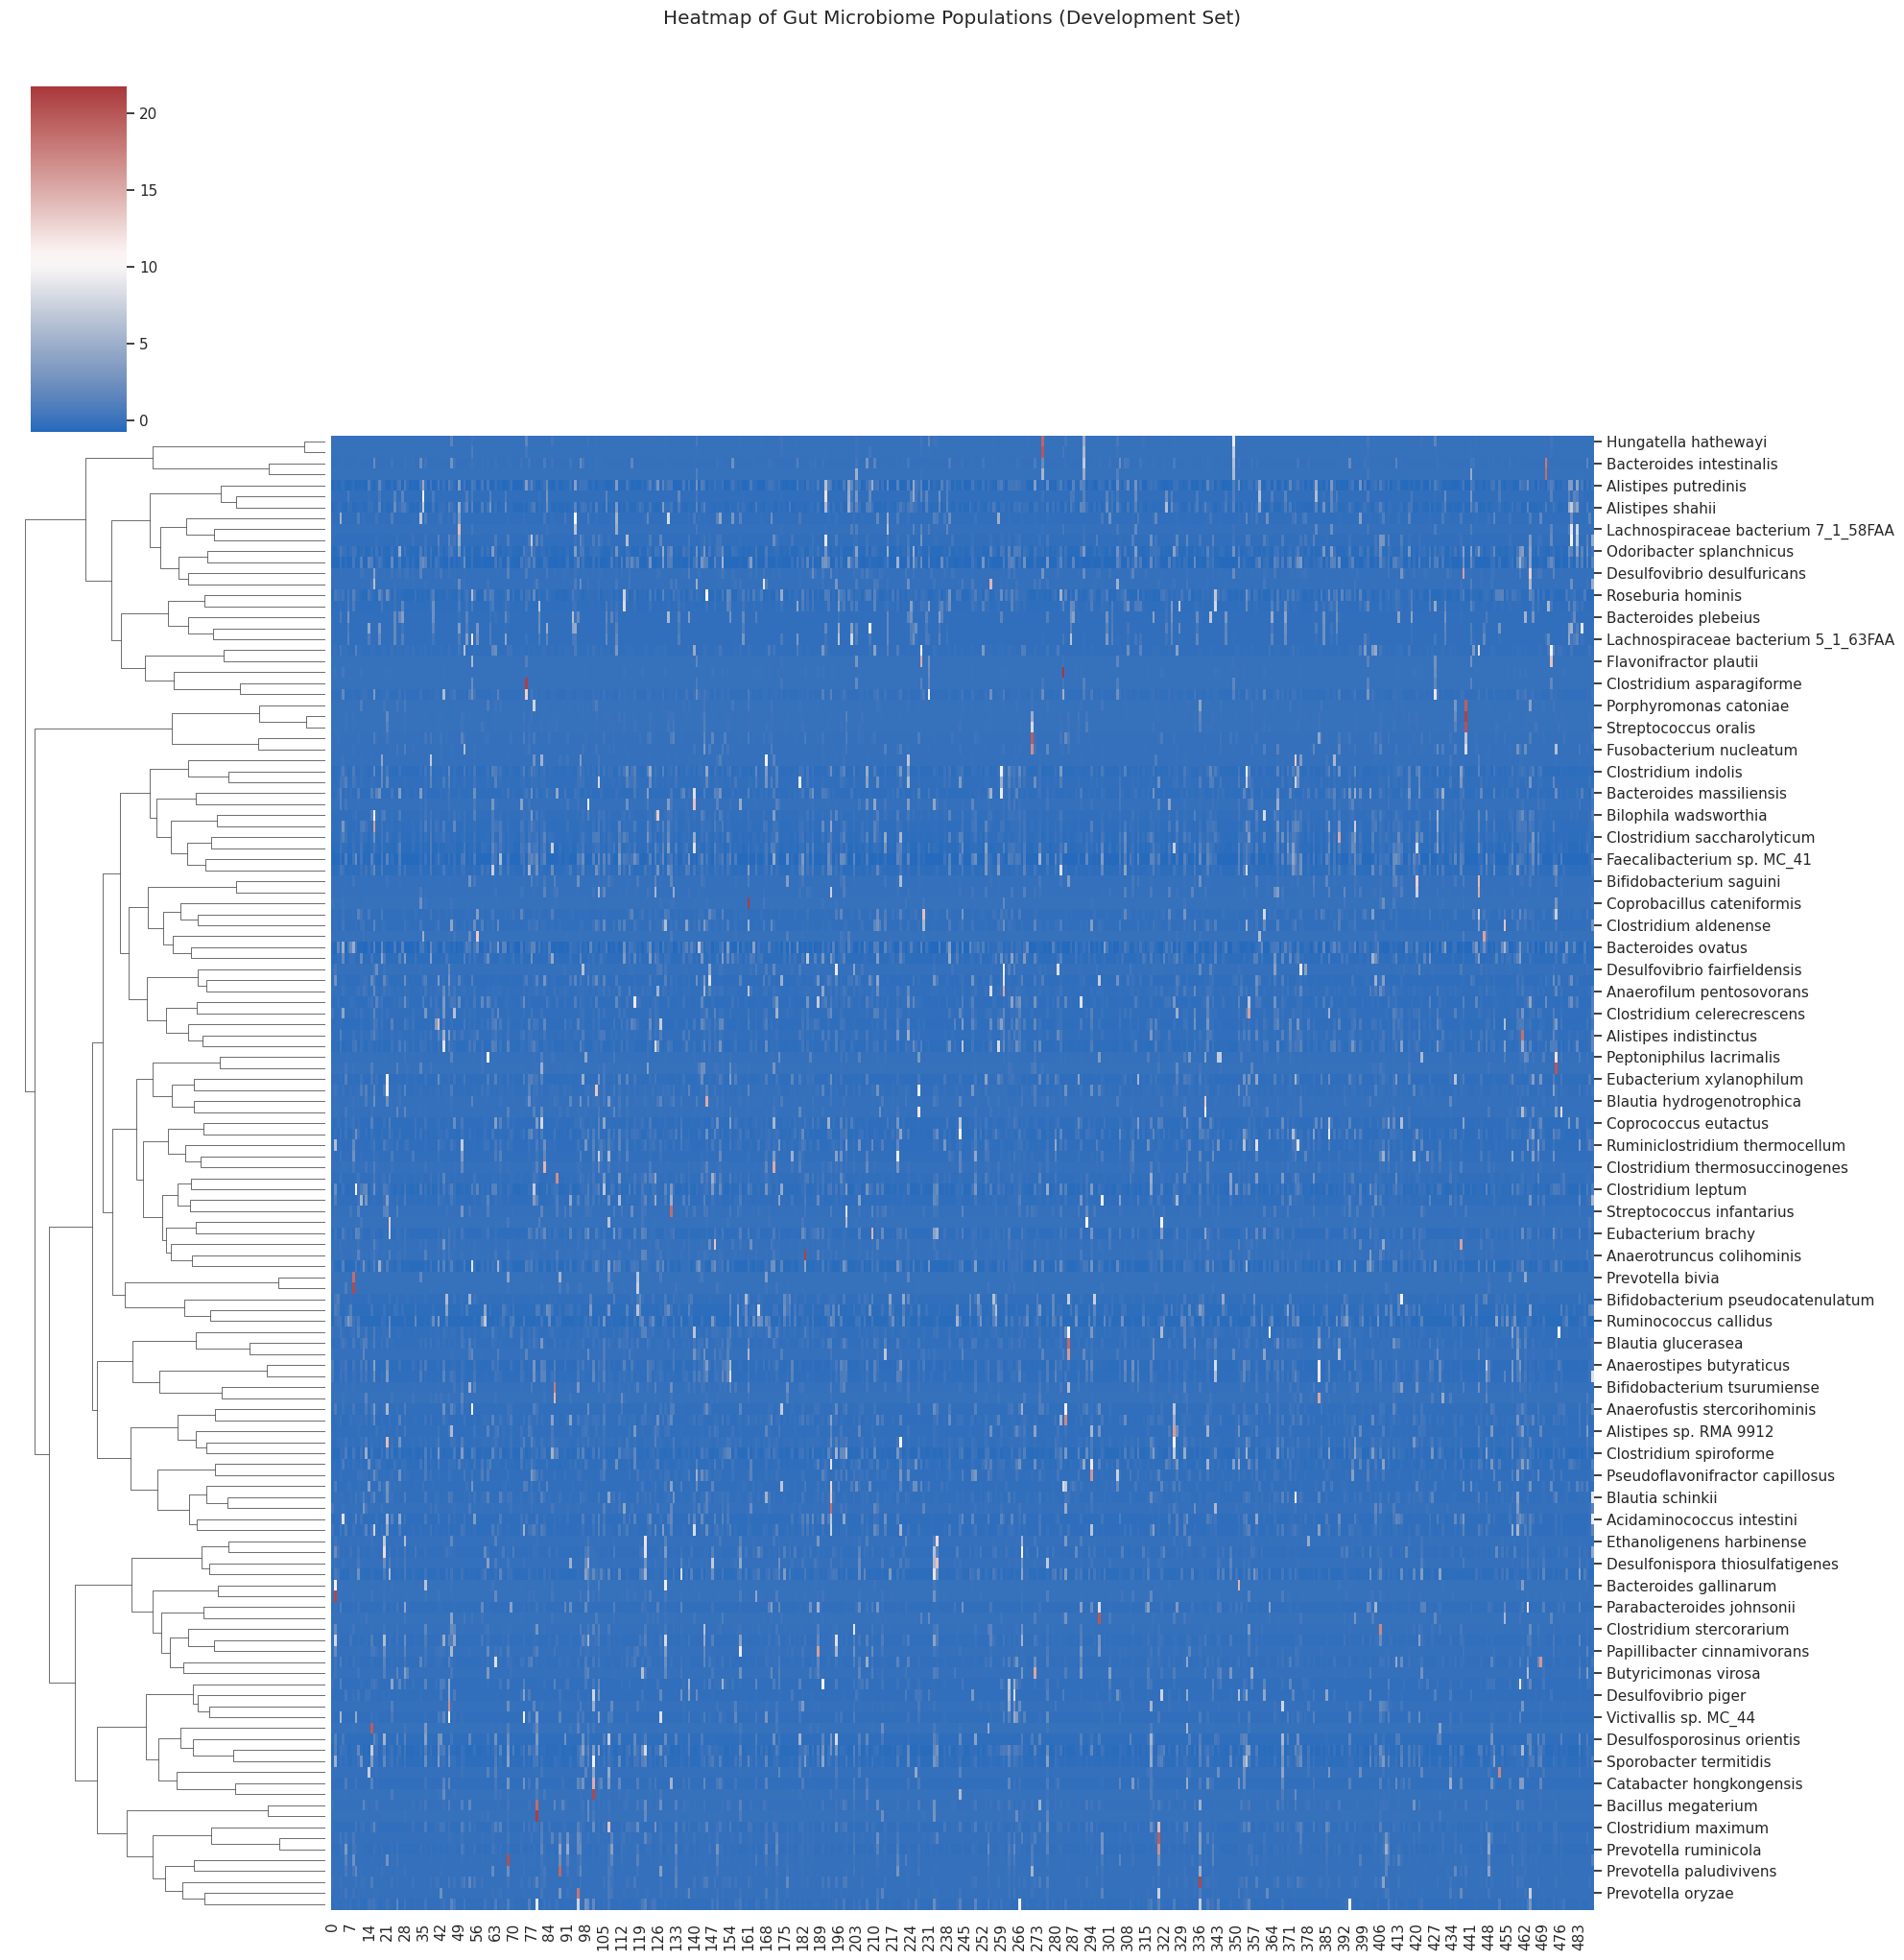

In [82]:
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler

# Extract only bacterial columns
bacterial_df = dev_set[bacterial_cols]

# Optionally standardize across samples (rows) to improve contrast
scaler = StandardScaler()
bacterial_scaled = pd.DataFrame(
    scaler.fit_transform(bacterial_df),
    columns=bacterial_df.columns,
    index=bacterial_df.index
)

# Create clustered heatmap
plt.figure(figsize=(20, 12))
sns.clustermap(
    bacterial_scaled.T,  # Transpose to have bacteria on y-axis
    cmap='vlag',
    figsize=(20, 20),
    metric='euclidean',
    method='ward',
    col_cluster=False  # Optional: keep samples in original order
)
plt.suptitle("Heatmap of Gut Microbiome Populations (Development Set)", y=1.02)
plt.show()


was not a very informative visualization, excluded from report.

UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


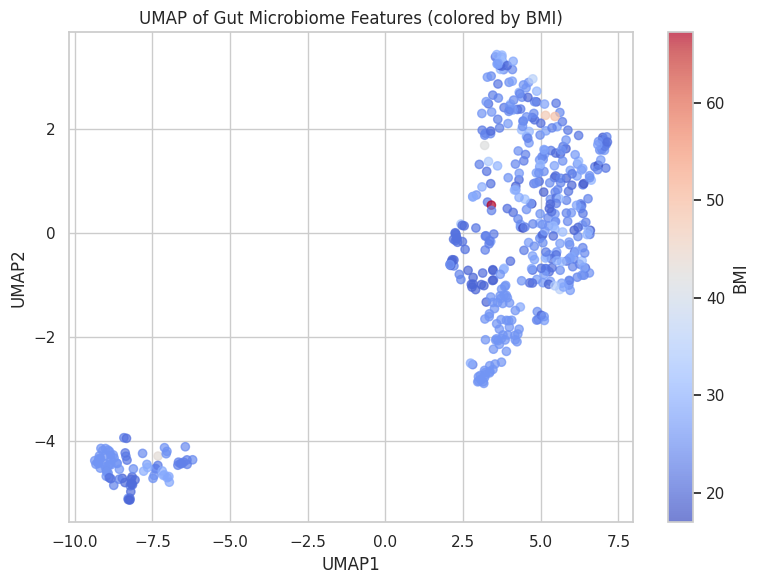

In [84]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: log-transform to stabilize variance
bact_data = np.log1p(dev_set[bacterial_cols])

# Standardize features
scaler = StandardScaler()
bact_data_scaled = scaler.fit_transform(bact_data)

# Fit UMAP with tuned parameters
reducer = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.1, metric='euclidean', random_state=42)
umap_result = reducer.fit_transform(bact_data_scaled)

# Create DataFrame
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['BMI'] = dev_set['BMI']
umap_df['Sex'] = dev_set['Sex']

# Plot with continuous colormap
plt.figure(figsize=(8, 6))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['BMI'], cmap='coolwarm', alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label('BMI')

plt.title('UMAP of Gut Microbiome Features (colored by BMI)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.tight_layout()
plt.show()


Export the cleaned datasets

In [66]:
# Export cleaned datasets to CSV
dev_set.to_csv('development_final_data.csv', index=False)
val_set.to_csv('evaluation_final_data.csv', index=False)